In [ ]:
from pylab import *
from scipy.stats import *

x = uniform(0,1).rvs(100)
a = 3
def g(z):
    return norm(z).rvs()
y = g(3*x)
(x,y)

In [5]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 6]

In [ ]:
plot(x,y, 'bo')
xlabel('x')
ylabel('y')
show()

In [ ]:
import numpy
aa = arange(0,10, 0.01)

likelihood = numpy.zeros(len(aa))
for i in range(len(aa)):
    likelihood[i] = exp(-1*sum(pow(y-x*aa[i], 2))/2)
plot(aa, likelihood)
xlabel("a")
ylabel("$ P(\textrm{data}|a) $")
yticks([])
show()

In [ ]:
def max_likelihood(n_samples):
    x = uniform(0,1).rvs(n_samples)
    a = 3
    def g(z):
        return norm(z).rvs()
    y = g(3*x)
    
    aa = arange(0,10, 0.01)
    likelihood = numpy.zeros(len(aa))
    for i in range(len(aa)):
        likelihood[i] = exp(-1*sum(pow(y-x*aa[i], 2))/2)    
    return (aa, likelihood)

clf()
for n in [10, 100, 1000]:
    aa, ll = max_likelihood(n)
    plot(aa, ll/max(ll), label="n="+str(n))
xlabel('a')
ylabel("Likelihood")
xticks([2,3,4])
yticks([])
legend()
show()


In [ ]:
ind_cols=2
N = 500
x_data = zeros(shape=(2,N), dtype=float)
x_data[0,:] = norm(0,3).rvs(N)
x_data[1,:] = 2*x_data[0,:] + norm(0,0.1).rvs(N)
y_data = x_data[0,:] + norm(0,0.5).rvs(N) + 1

In [ ]:
import pymc

# model our intercept and error term as above
b0 = pymc.Uniform('b0', -5, 5)
 
# initialize a NumPy array to hold our betas
# and our observed x values
b = np.empty(ind_cols, dtype=object)
x = np.empty(ind_cols, dtype=object)
 
# loop through b, and make our ith beta
# a normal random variable, as in the single variable case
for i in range(ind_cols):
    b[i] = pymc.Normal('b' + str(i + 1), 0, 15)
 
# loop through x, and inform our model about the observed
# x values that correspond to the ith position
for i in range(ind_cols):
    x[i] = pymc.Normal('b' + str(i + 1), 0, 5, value=x_data[i], observed=True)
 
# as above, but use .dot() for 2D array (i.e., matrix) multiplication
@pymc.deterministic
def y_pred(b0=b0, b=b, x=x):
    return b0 + b.dot(x)
 
# finally, "model" our observed y values as above
y = pymc.Normal('y', y_pred, 1, value=y_data, observed=True)
 
test_model = pymc.Model([b0, pymc.Container(b), pymc.Container(x), y, y_pred])
mcmc = pymc.MCMC(test_model)
mcmc.sample(iter=500000, burn=100000, thin=10)

In [ ]:
plot(mcmc.trace('b0')[:], mcmc.trace('b1')[:], 'bo', alpha=0.05)
show()

In [ ]:
ind_cols=2
N = 10
x_data = zeros(shape=(2,N), dtype=float)
x_data[0,:] = norm(0,1).rvs(N)
x_data[1,:] = x_data[0,:] +norm(0,0.01).rvs(N)
y_data = 2*x_data[0,:] + norm(0,0.5).rvs(N) + 1

In [ ]:
ind = indices((1000,1000), dtype=float) / 100.0 - 5

ll = ones(shape=(1000,1000), dtype=float)
ll = numpy.exp(-1*pow(ind[0], 2))
for i in range(N):
    ll *= numpy.exp(-1*pow((ind[1]*x_data[0,i] + ind[0]*x_data[1,i] - y_data[i]), 2))
imshow(ll, extent=[ind.min(), ind.max(), ind.min(), ind.max()], origin='lower')
jet()
xlabel("hours")
#xticks([])
ylabel("age")
#yticks([])
colorbar()
show()


In [ ]:
from pylab import *
from scipy.optimize import minimize

dx = 0.01
a = arange(dx,50, dx)

x=1.0
clf()
mins = []
yy = [1.0,5.0,10.0]
for y in yy:
    mins.append( minimize(lambda aa: y/exp(aa)+aa, x0=[0.0]).x)
    plot(a, y/(a*x) + log(a*x), label="y="+str(y))
xticks([])
yticks([])
legend()
mins = exp(array(mins))
print("Mins:" + str(mins))
ylim(0,10)
xlabel("$\\vec{a}$")
ylabel("Likelihood")
show()

In [ ]:
from pylab import *
from scipy.stats import uniform, expon

N = 1000
x = uniform(1,20).rvs(N)
y = expon(scale=3*x).rvs()

plot(x, y, 'bo', alpha=0.1)
xticks([])
yticks([])
xlabel("x")
ylabel("y")
show()

min_result:       fun: 12399.679239312052
 hess_inv: array([[ 0.00040798]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 1.26617186]) -> [ 3.54724718]


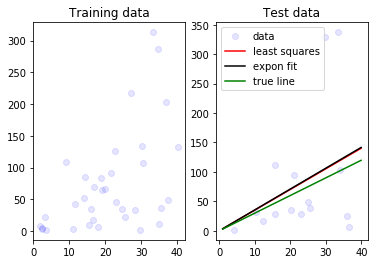

(array([[ 3.51221048]]), 0.0)

In [4]:
from sklearn.linear_model import *
from scipy.optimize import minimize
from scipy.stats import uniform, expon

xmax=40
N = 50
coeff = 3
x = uniform(1,xmax).rvs((N,1))
y = expon(scale=coeff*x).rvs()


lr = LinearRegression(fit_intercept=False)

k = int(0.6*N)

lr.fit(x[0:k], y[0:k])

def log_prior(a):
    return dot(a,a)/20

def log_likelihood(a, xx, yy):
    return (yy/dot(xx, exp(a)) + 2*log(dot(xx, exp(a)))).sum()

k = int(0.7*N)

min_result = minimize(lambda a: log_likelihood(a, x[0:k], y[0:k]), x0 = [0])
print("min_result: " + str(min_result) + " -> " + str(exp(min_result.x)))

subplot(121)
title("Training data")
plot(x[0:k], y[0:k], 'bo', alpha=0.1)
subplot(122)
title("Test data")
plot(x[k:], y[k:], 'bo', alpha=0.1, label='data')
tt = arange(1,xmax,0.1)
plot(tt, lr.coef_[0,0]*tt, 'r', label='least squares')
plot(tt, exp(min_result.x[0])*tt, 'k', label='expon fit')
plot(tt, 0 + coeff*tt, 'g', label='true line')
legend()
show()
lr.coef_, lr.intercept_

In [ ]:


lstq = []
ml = []

for i in range(500):
    lr = LinearRegression(fit_intercept=False)
    lr.fit(x[0:k], y[0:k])
    lstq.append(lr.coef_[0])
    xmax = 40
    N = 50
    coeff = 3
    x = uniform(1,xmax).rvs((N,1))
    y = expon(scale=coeff*x).rvs()
    min_result = minimize(lambda a: log_likelihood(a, x, y), x0 = [0])
    ml.append(exp(min_result.x[0]))
lstq = array(lstq)
ml = array(ml)
    
print("Min result lstq: " + str( std(lstq-coeff)))
print("Min result ml: " + str( std(ml-coeff)))


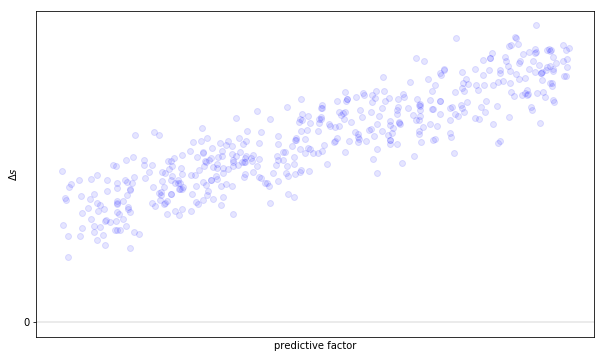

In [7]:
from pylab import *
from scipy.stats import uniform, norm

xmax=40
N = 500
coeff = [0.5, 1.1]
x = uniform(0,xmax).rvs((N,1))
y = norm(loc=coeff[0]*x+15, scale=3).rvs()

yticks([0])
xticks([])
ylabel("$\Delta s $")
xlabel("predictive factor")
axhline(0, color='k', alpha=0.1)

plot(x[k:], y[k:], 'bo', alpha=0.1, label='data')
show()

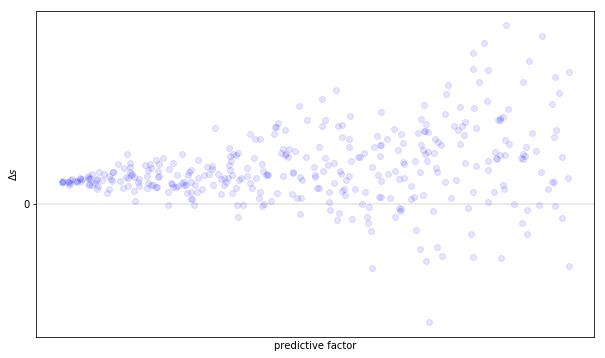

In [53]:
xmax=40
N = 500
coeff = [0.5, 1.1]
x = uniform(0,xmax).rvs((N,1))
y = norm(loc=coeff[0]*x+15, scale=x*coeff[1]).rvs()

yticks([0])
xticks([])
ylabel("$\Delta s $")
xlabel("predictive factor")
axhline(0, color='k', alpha=0.1)
plot(x[k:], y[k:], 'bo', alpha=0.1, label='data')
show()

min_result:       fun: 679.6016233470261
 hess_inv: array([[  5.81316867e-02,   1.66083522e-04,  -8.83499922e-02],
       [  1.66083522e-04,   2.50577126e-03,   2.14722193e-04],
       [ -8.83499922e-02,   2.14722193e-04,   3.65879308e-01]])
      jac: array([  0.00000000e+00,   7.62939453e-06,   7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 110
      nit: 15
     njev: 22
   status: 0
  success: True
        x: array([ -0.92123436,   0.08446406,  14.79680911]) -> [  3.98027428e-01   1.08813373e+00   2.66791842e+06]


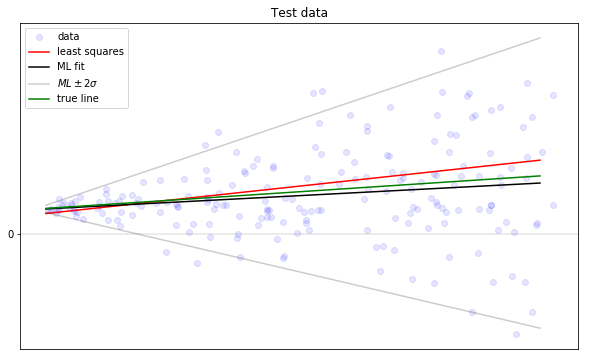

(array([[ 0.82082301]]), array([ 11.62339161]))

In [62]:
from pylab import *
from sklearn.linear_model import *
from scipy.optimize import minimize
from scipy.stats import uniform, expon, norm

xmax=40
N = 200
coeff = [0.5, 1.1]
x = uniform(1,xmax).rvs((N,1))
y = norm(loc=coeff[0]*x+15, scale=x*coeff[1]).rvs()


lr = LinearRegression()

k = int(0.6*N)

lr.fit(x[0:k], y[0:k])

def log_likelihood(a, xx, yy):
    return pow((y-exp(a[0])*x-a[2])/(sqrt(2)*exp(a[1])*x), 2).sum() + log(exp(a[1])*x).sum()

k = int(0.7*N)

min_result = minimize(lambda a: log_likelihood(a, x[0:k], y[0:k]), x0 = [0,0,0])
print("min_result: " + str(min_result) + " -> " + str(exp(min_result.x)))


title("Test data")
plot(x, y, 'bo', alpha=0.1, label='data')
tt = arange(1,xmax,0.1)
plot(tt, lr.coef_[0,0]*tt + lr.intercept_, 'r', label='least squares')
plot(tt, exp(min_result.x[0])*tt+min_result.x[2], 'k', label='ML fit')
plot(tt, exp(min_result.x[0])*tt+min_result.x[2]+2*tt*exp(min_result.x[1]), 'k', alpha=0.2, label="$ML \pm 2\sigma$")
plot(tt, exp(min_result.x[0])*tt+min_result.x[2]-2*tt*exp(min_result.x[1]), 'k', alpha=0.2)
plot(tt, 0 + coeff[0]*tt+15, 'g', label='true line')
yticks([0])
xticks([])
axhline(0, color='k', alpha=0.1)
legend()
show()
lr.coef_, lr.intercept_